# Libraries
Pandas
GeoPandas - map visualization
matplotlib

In [1]:
import pandas as pd
import geopandas as gpd


### Function to draw map and visualize languages

In [2]:
def plot_langs(df: pd.DataFrame, continent: str):
    x = df[['Name','Latitude', 'Longitude']]
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

    gdf_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    filter = None
    if (continent == 'Eurasia') : filter = ((gdf_world['continent'] == 'Europe') | (gdf_world['continent'] == 'Asia'))
    elif (continent == 'Europe') : filter = ((gdf_world['continent'] == 'Europe') & (gdf_world['name'] != 'Russia')) #Asian part of Russia mess up map
    elif (continent == 'Eurafrica') : filter = (((gdf_world['continent'] == 'Europe') | (gdf_world['continent'] == 'Africa')) & (gdf_world['name'] != 'Russia')) #Asian part of Russia mess up map
    else: filter = gdf_world['continent'] > 'A' 

    # filter = gdf_world['continent'] > 'A'
    
    # ax = gdf_world[gdf_world['continent'] == 'Europe'].plot(figsize=(10, 6), color='white', edgecolor='black')
    ax = gdf_world[filter].plot(figsize=(10, 6), color='white', edgecolor='black')
    gdf.plot(ax=ax, marker='o', color='red', markersize=5)



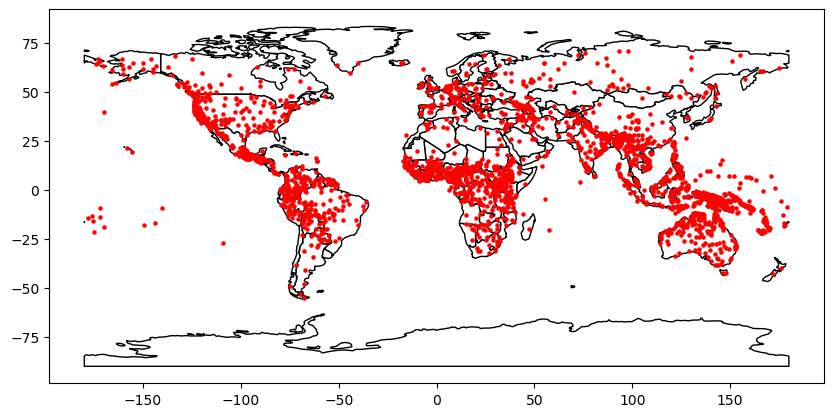

In [3]:
df = pd.read_csv('data/languages.csv', sep=',', index_col=0 )
plot_langs(df, 'world')

In [4]:
df.shape[0]

3573

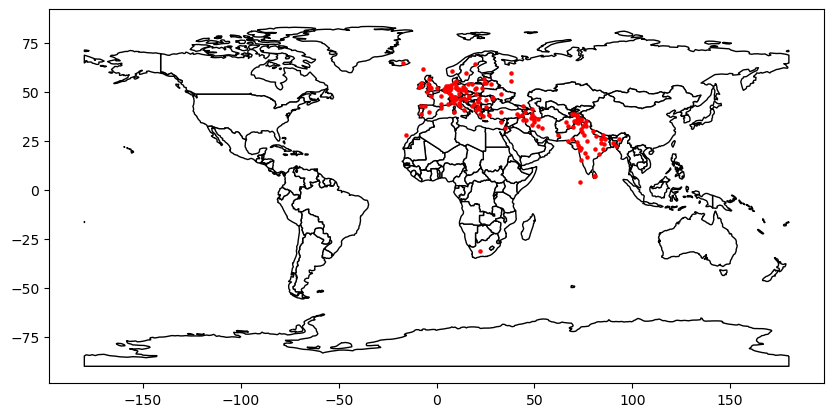

In [5]:
df_indo_europ = df[df['Family'] == 'Indo-European']
plot_langs(df_indo_europ, 'World')

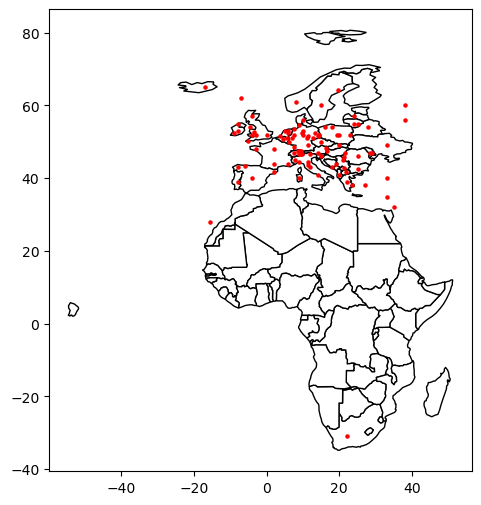

In [6]:
df_europe_only = df_indo_europ[df_indo_europ['Longitude'] <= 40]

plot_langs(df_europe_only, 'Eurafrica')

In [7]:
df_europe_only.shape[0]
# df_europe_only[df_europe_only['Name'].str.contains('^German*')]

103

/var/folders/nv/9fbrs3b529qbpsp0l0yttj3c0000gn/T/ipykernel_22467/3649263563.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_europe_standard_lang_only = df_europe_only[filter]


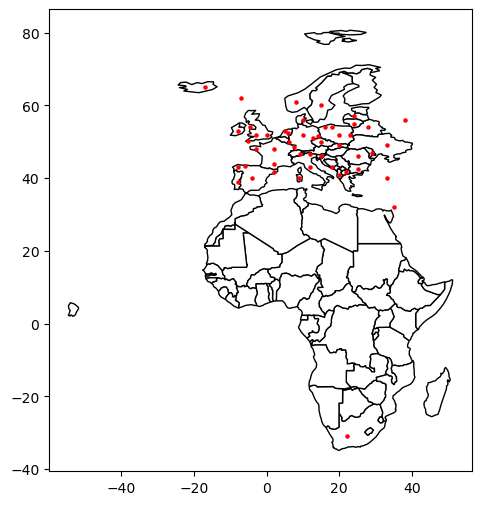

In [8]:
#remove dialects
filter = (df_indo_europ['Name'].str.contains('^[a-zA-Z]*$'))

df_europe_standard_lang_only = df_europe_only[filter]

plot_langs(df_europe_standard_lang_only, 'Eurafrica')


In [35]:
df_europe_standard_lang_only.shape[0]

50

# Output

In [20]:
# df_europe_standard_lang_only
df_output = df_europe_standard_lang_only[['Name', 'Macroarea', 'Latitude', 'Longitude', 'Family', 'Subfamily', 'Genus']]
df_output
# df_output.to_csv('data/european_languages.csv')

,Name,Macroarea,Latitude,Longitude,Family,Subfamily,Genus
ID,,,,,,,
afr,Afrikaans,Africa,-31.000000,22.000000,Indo-European,NaN,Germanic
alb,Albanian,Eurasia,41.000000,20.000000,Indo-European,NaN,Albanian
alt,Alsatian,Eurasia,48.500000,7.500000,Indo-European,NaN,Germanic
ast,Asturian,Eurasia,43.250000,-6.000000,Indo-European,NaN,Romance
blr,Belorussian,Eurasia,54.000000,28.000000,Indo-European,NaN,Slavic
bos,Bosnian,Eurasia,43.000000,18.000000,Indo-European,NaN,Slavic
bre,Breton,Eurasia,48.000000,-3.000000,Indo-European,NaN,Celtic
bul,Bulgarian,Eurasia,42.500000,25.000000,Indo-European,NaN,Slavic
crn,Cornish,Eurasia,50.333333,-5.000000,Indo-European,NaN,Celtic
